In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)


In [2]:
def asf_project(pr):
    name = pr.split("-")[0]
    if name == "incubator":
        return pr.split("-")[1]
    return name

In [3]:
project = "ozone"

In [4]:
# Parameters
project = "skywalking"


In [5]:
actions = pd.read_csv("github-action-run.csv.gz")
                          
actions.createdat = pd.to_datetime(actions.createdat * 1000000, utc = True)
actions.updatedat = pd.to_datetime(actions.updatedat * 1000000, utc = True)
actions.firstjobstarted = pd.to_datetime(actions.firstjobstarted * 1000000, utc = True)
actions.lastjobcompleted = pd.to_datetime(actions.lastjobcompleted * 1000000, utc = True)                

In [6]:
actions["project"] = actions.repo.apply(asf_project)
actions["jobhours"] = actions.jobseconds / 60 / 60
actions["month"] = actions.createdat.dt.strftime("%Y-%m")

In [7]:
actions =  actions[actions.month.isin(["2021-03","2021-02"])]
last_month = "2021-03"
actions = actions[actions.project == project]

## Number of jobhours used by month

Maximum available value is 180 * 24 * days == 129600 (30 days) .. 133920 (31 days)

In [8]:
actions[["jobhours"]].groupby([actions.project,actions.month]).count().reset_index().groupby("month").sum()

,jobhours
month,
2021-02,6276
2021-03,7145


## Number of jobs executed by git repositories (last month)

In [9]:
actions[actions.month == last_month][["repo","jobhours"]].groupby("repo").agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False).head(20)

jobhours                    
                                              sum      mean       max
repo                                                                 
skywalking                            6828.988889  1.009310  7.520278
skywalking-nodejs                       19.838056  0.118084  1.479722
skywalking-rocketbot-ui                  1.453056  0.022016  0.111944
skywalking-infra-e2e                     1.060000  0.036552  0.099444
skywalking-cli                           0.523889  0.104778  0.115278
skywalking-nginx-lua                     0.476944  0.015898  0.042778
skywalking-client-js                     0.219167  0.016859  0.018611
skywalking-agent-test-tool               0.171944  0.085972  0.089167
skywalking-data-collect-protocol         0.004722  0.001181  0.001389
skywalking-eyes                          0.000000  0.000000  0.000000
skywalking-goapi                         0.000000  0.000000  0.000000
skywalking-kubernetes                    0.000000  0.000000  0.000000
skywalking-kubernetes-event-exporter     0.000000  0.000000  0.000000
skywalking-python                        0.000000  0.000000  0.000000
skywalking-satellite                     0.000000  0.000000  0.000000
skywalking-swck                          0.000000  0.000000  0.000000

## Job hour statustics per workflows

In [10]:
actions[actions.month == last_month][["repo","workflowid","jobhours"]].groupby(["repo","workflowid"]).agg({"jobhours":["sum","mean", "max"]}).sort_values(('jobhours',"sum"), ascending=False)

jobhours            \
                                                        sum      mean   
repo                                 workflowid                         
skywalking                           3016670     607.962222  2.067899   
                                     6714        503.248611  1.558045   
                                     760463      476.194167  1.474285   
                                     6712        462.523056  1.583983   
                                     760460      459.131111  1.421459   
                                     2073354     390.086667  1.335913   
                                     844740      383.120833  3.683854   
                                     5408896     382.635556  1.310396   
                                     844739      361.219444  3.473264   
                                     761404      345.556944  1.183414   
                                     4650414     334.277500  1.144786   
                                     844738      328.997778  3.163440   
                                     760461      316.119167  1.086320   
                                     760462      301.533333  0.933540   
                                     1818664     282.056111  0.965946   
                                     844741      279.053889  2.683210   
                                     6519833      96.479444  0.385918   
                                     6715         86.534722  0.296352   
                                     1015163      75.850556  0.259762   
                                     1241478      71.177500  0.243759   
                                     4329544      70.969167  0.219719   
                                     4483459      70.140556  0.240207   
                                     833736       62.247222  0.213175   
                                     4053349      61.331667  0.210040   
skywalking-nodejs                    3873989      18.657222  0.222110   
skywalking                           2294479      11.779167  0.113261   
                                     5898945       8.762500  0.030009   
skywalking-rocketbot-ui              6874          1.453056  0.022016   
skywalking-nodejs                    3873988       1.180833  0.014058   
skywalking-infra-e2e                 4544856       1.060000  0.036552   
skywalking-cli                       88339         0.523889  0.104778   
skywalking-nginx-lua                 636977        0.312778  0.020852   
skywalking-client-js                 126522        0.219167  0.016859   
skywalking-agent-test-tool           664443        0.171944  0.085972   
skywalking-nginx-lua                 598370        0.164167  0.010944   
skywalking-data-collect-protocol     2136574       0.004722  0.001181   
skywalking-goapi                     7333851       0.000000  0.000000   
skywalking-eyes                      4404999       0.000000  0.000000   
skywalking-kubernetes                3048630       0.000000  0.000000   
                                     3048631       0.000000  0.000000   
skywalking-kubernetes-event-exporter 7307704       0.000000  0.000000   
skywalking-python                    1200606       0.000000  0.000000   
skywalking-satellite                 3304058       0.000000  0.000000   
skywalking-swck                      3353580       0.000000  0.000000   

                                                           
                                                      max  
repo                                 workflowid            
skywalking                           3016670     4.646111  
                                     6714        2.805278  
                                     760463      7.020556  
                                     6712        3.222222  
                                     760460      5.140833  
                                     2073354     7.520278  
                                     844740      5.732222  
                   

## Slowest workflow runs


In [11]:
actions.sort_values("jobhours", ascending=False).head(25)

,org,repo,id,runnumber,createdat,updatedat,status,conclusion,workflowid,firstjobstarted,lastjobcompleted,jobdetails,jobs,jobseconds,project,jobhours,month
1079810,apache,skywalking,667046213,2498,2021-03-19 06:28:57+00:00,2021-03-19 22:30:04+00:00,completed,failure,2073354,2021-03-19 16:28:28+00:00,2021-03-19 22:29:58+00:00,True,6,27073,skywalking,7.520278,2021-03
1079660,apache,skywalking,623199428,2362,2021-03-05 03:29:19+00:00,2021-03-05 11:28:40+00:00,completed,failure,2073354,2021-03-05 05:26:40+00:00,2021-03-05 11:28:33+00:00,True,6,26730,skywalking,7.425000,2021-03
1092728,apache,skywalking,685913073,462,2021-03-25 08:50:04+00:00,2021-03-25 16:57:05+00:00,completed,failure,5408896,2021-03-25 10:53:32+00:00,2021-03-25 16:56:57+00:00,True,5,26697,skywalking,7.415833,2021-03
1091883,apache,skywalking,617237671,569,2021-03-03 10:35:37+00:00,2021-03-03 19:08:01+00:00,completed,failure,4650414,2021-03-03 13:02:05+00:00,2021-03-03 19:07:56+00:00,True,5,26072,skywalking,7.242222,2021-03
1092053,apache,skywalking,665517624,721,2021-03-18 18:19:39+00:00,2021-03-19 09:02:59+00:00,completed,failure,4650414,2021-03-19 03:02:41+00:00,2021-03-19 09:02:53+00:00,True,5,26048,skywalking,7.235556,2021-03
1139913,apache,skywalking,617056775,4880,2021-03-03 09:26:07+00:00,2021-03-03 13:33:41+00:00,completed,success,760463,2021-03-03 10:49:26+00:00,2021-03-03 13:33:34+00:00,True,8,25274,skywalking,7.020556,2021-03
1157754,apache,skywalking,604433764,3605,2021-02-27 00:57:24+00:00,2021-02-27 02:43:25+00:00,completed,failure,844739,2021-02-27 01:13:07+00:00,2021-02-27 02:43:14+00:00,True,30,23739,skywalking,6.594167,2021-02
1079921,apache,skywalking,701887144,2598,2021-03-30 15:10:15+00:00,2021-03-31 02:47:49+00:00,completed,cancelled,2073354,2021-03-30 21:35:50+00:00,2021-03-31 02:47:43+00:00,True,6,22990,skywalking,6.386111,2021-03
1129037,apache,skywalking,542867680,4513,2021-02-06 10:02:17+00:00,2021-02-06 11:34:15+00:00,completed,failure,760461,2021-02-06 10:03:49+00:00,2021-02-06 11:34:11+00:00,True,4,21648,skywalking,6.013333,2021-02
1161515,apache,skywalking,598588045,3600,2021-02-25 06:48:26+00:00,2021-02-25 07:17:44+00:00,completed,success,844740,2021-02-25 06:48:57+00:00,2021-02-25 07:17:32+00:00,True,27,21382,skywalking,5.939444,2021-02


In [12]:
job = pd.read_csv("github-action-job.csv.gz")                          
job.startedat = pd.to_datetime(job.startedat * 1000000, utc = True)
job.completedat = pd.to_datetime(job.completedat * 1000000, utc = True)
job["project"] = job.repo.apply(asf_project)

In [13]:
job["jobhours"] = (job.completedat - job.startedat).dt.seconds / 60 / 60

In [14]:
job = job[job.project == project]

## Slowest job executions by job names

In [15]:
job[["jobhours"]].groupby([job.org,job.repo, job.name]).sum().reset_index().sort_values("jobhours", ascending=False).head(25)

,org,repo,name,jobhours
10,apache,skywalking,CI,462.805833
13,apache,skywalking,CI-on-Windows,295.269722
12,apache,skywalking,CI-on-MacOS,295.095000
11,apache,skywalking,CI-on-JDK11,225.184722
19,apache,skywalking,"Coordinators & Storage (zk, es7)",191.144722
18,apache,skywalking,"Coordinators & Storage (zk, es6)",189.698889
8,apache,skywalking,Alarm,187.274167
32,apache,skywalking,Istio(1.7.1)+ALS(mx-mesh),187.197222
20,apache,skywalking,"Coordinators & Storage (zk, influxdb)",184.273889
35,apache,skywalking,Istio(1.8.2)+ALS(mx-mesh),183.428889


## Number of job executions per status

In [16]:
job[["id"]].groupby([job.org,job.repo,  job.conclusion]).count().reset_index().sort_values("id", ascending=False).head(25)

,org,repo,conclusion,id
4,apache,skywalking,success,54555
0,apache,skywalking,cancelled,24065
1,apache,skywalking,failure,2779
3,apache,skywalking,skipped,851
22,apache,skywalking-satellite,success,366
17,apache,skywalking-nodejs,success,332
19,apache,skywalking-satellite,cancelled,147
2,apache,skywalking,neutral,127
18,apache,skywalking-rocketbot-ui,success,118
8,apache,skywalking-client-js,success,115


In [17]:
start = job.loc[:,["org","repo","project","id","runid","startedat"]]
start["value"] = 1
start = start.rename(columns={"startedat":"date"})

end = job.loc[:,["org","repo","project","id","runid","completedat"]]
end["value"] = -1
end = end.rename(columns={"completedat":"date"})
events = pd.concat([start, end]).sort_values("date")
events["running"] = events.value.cumsum()


## Average (12h window) parallel running/queued job at a given time

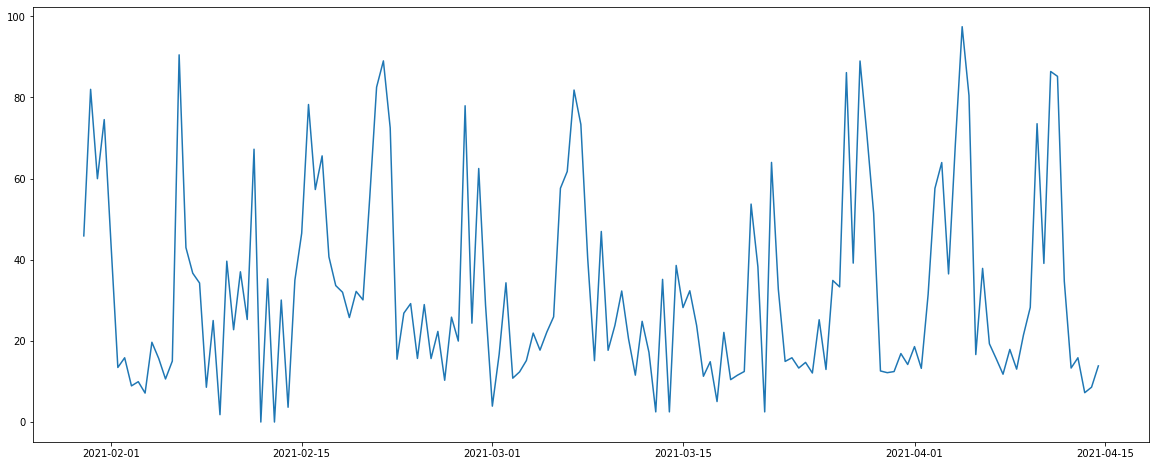

In [18]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").mean().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()

In [19]:
## Max (12h window) parallel running/queued job at a given time

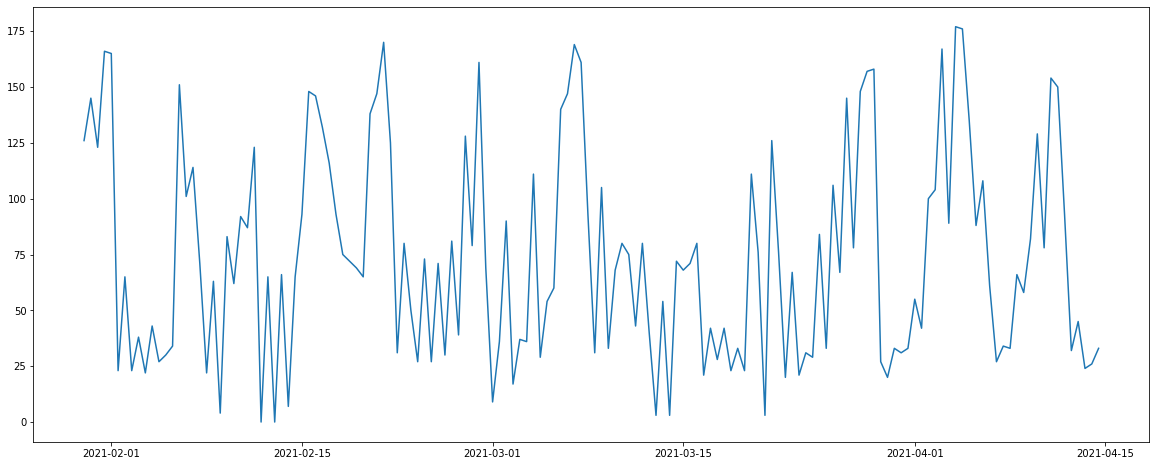

In [20]:

r = events.set_index('date')
r = r.sort_index()
r = r.resample("12H").max().fillna(0)

plt.figure(figsize=(20,8))
plt.plot(r.index,r.running)
plt.show()